### **0. Set-up**

In [1]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [2]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f8.csv")

In [3]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f8.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [4]:
# Select first 25 word pairs
raw_nl_pred = raw_nl_pred.head(25)
raw_en_pred = raw_en_pred.head(25)

In [5]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,gelukkig,vrolijk,7.69,7.94,6.78,7.69,6.88,7.14,7.48,6.87,8.25,8.27,7.56,7.84,5.81,5.78,7.5
1,hard,stoer,4.31,6.04,5.30,5.08,5.43,6.00,6.05,3.75,4.04,7.36,6.38,6.12,4.23,5.04,7.5
2,snel,razendsnel,8.77,8.30,7.93,9.84,9.42,9.00,8.84,8.50,9.52,9.09,8.24,8.82,8.93,8.42,9.5
3,gelukkig,blij,6.62,7.43,7.81,6.73,8.43,7.14,8.02,6.07,8.68,7.64,7.16,6.76,8.68,7.73,8.5
4,kort,lang,2.31,4.32,4.98,5.22,2.38,3.13,4.47,3.80,2.08,4.09,0.24,5.18,5.72,3.00,4.0
5,dom,stom,6.46,3.56,7.08,6.77,5.84,7.50,5.16,4.67,5.16,6.73,6.88,6.53,6.64,5.00,7.5
6,vreemd,eigenaardig,8.77,8.14,7.99,7.99,9.41,8.75,8.08,8.04,8.25,9.09,8.93,9.16,9.38,9.35,9.0
7,breed,smal,1.15,4.73,4.26,5.36,3.52,1.88,3.71,3.75,2.08,2.64,2.93,6.47,4.73,1.10,2.0
8,makkelijk,moeilijk,1.46,2.96,3.33,3.73,3.14,2.38,2.64,3.65,4.95,3.00,2.91,4.08,2.50,3.00,1.5
9,moeilijk,gemakkelijk,7.15,5.31,6.33,5.16,8.07,6.25,3.82,8.15,4.95,5.18,6.07,4.08,4.82,4.28,6.5


In [6]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,happy,cheerful,8.75,9.20,7.76,5.26,9.50,9.6,8.66,8.50,9.15,8.57,8.90,8.2,9.8,8.90,8.89
1,hard,easy,4.10,1.73,0.81,3.00,1.67,3.5,4.52,1.14,1.98,2.14,5.65,3.2,6.0,2.33,5.00
2,fast,rapid,9.50,9.60,9.34,9.75,9.80,8.5,9.68,9.21,8.90,9.29,9.50,9.8,9.7,8.20,9.17
3,happy,glad,8.50,8.60,8.47,7.50,9.40,8.8,7.90,8.09,8.00,8.57,7.80,7.6,9.7,8.50,8.89
4,short,long,7.25,7.50,0.71,5.50,9.60,5.5,6.42,7.80,7.34,8.57,8.20,8.8,9.2,7.50,6.33
5,stupid,dumb,9.00,8.90,8.66,9.75,9.20,9.0,8.79,9.21,9.40,8.10,7.00,9.7,8.5,9.50,8.67
6,weird,strange,9.00,9.70,9.15,9.50,9.80,9.2,9.24,8.62,9.85,9.29,9.30,9.8,9.9,9.30,9.68
7,wide,narrow,8.50,6.10,5.56,8.75,9.20,6.0,7.10,7.05,3.65,8.57,7.00,8.7,7.5,8.50,8.44
8,easy,difficult,4.25,1.86,0.63,3.25,4.70,3.2,3.50,1.75,2.18,2.86,4.00,2.5,6.5,2.50,3.56
9,hard,simple,4.50,3.65,2.81,3.00,2.60,3.8,4.91,1.25,1.84,4.29,5.50,3.5,7.5,3.67,3.78


### **1. Data Processing**

In [7]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,gelukkig,vrolijk,7.30,0.76
1,hard,stoer,5.51,1.14
2,snel,razendsnel,8.87,0.54
3,gelukkig,blij,7.56,0.81
4,kort,lang,3.66,1.48
5,dom,stom,6.10,1.15
6,vreemd,eigenaardig,8.69,0.55
7,breed,smal,3.35,1.58
8,makkelijk,moeilijk,3.02,0.90
9,moeilijk,gemakkelijk,5.74,1.35


In [8]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,happy,cheerful,8.64,1.08
1,hard,easy,3.12,1.64
2,fast,rapid,9.33,0.48
3,happy,glad,8.42,0.63
4,short,long,7.08,2.15
5,stupid,dumb,8.89,0.69
6,weird,strange,9.42,0.37
7,wide,narrow,7.37,1.54
8,easy,difficult,3.15,1.41
9,hard,simple,3.77,1.51


In [9]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,gelukkig,vrolijk,7.30,0.76,happy,cheerful,8.64,1.08
1,hard,stoer,5.51,1.14,hard,easy,3.12,1.64
2,snel,razendsnel,8.87,0.54,fast,rapid,9.33,0.48
3,gelukkig,blij,7.56,0.81,happy,glad,8.42,0.63
4,kort,lang,3.66,1.48,short,long,7.08,2.15
5,dom,stom,6.10,1.15,stupid,dumb,8.89,0.69
6,vreemd,eigenaardig,8.69,0.55,weird,strange,9.42,0.37
7,breed,smal,3.35,1.58,wide,narrow,7.37,1.54
8,makkelijk,moeilijk,3.02,0.90,easy,difficult,3.15,1.41
9,moeilijk,gemakkelijk,5.74,1.35,hard,simple,3.77,1.51


### **2. Descriptive Statistics**

In [10]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,5.66,7.64,0.98,1.00
std,2.36,1.91,0.36,0.57
min,2.40,3.12,0.54,0.34
25%,3.35,7.08,0.76,0.47
50%,5.74,8.42,0.80,0.85
75%,7.74,9.16,1.29,1.51
max,9.02,9.42,1.62,2.15
median,5.74,8.42,0.80,0.85


#### **2.1. SimLex-999**

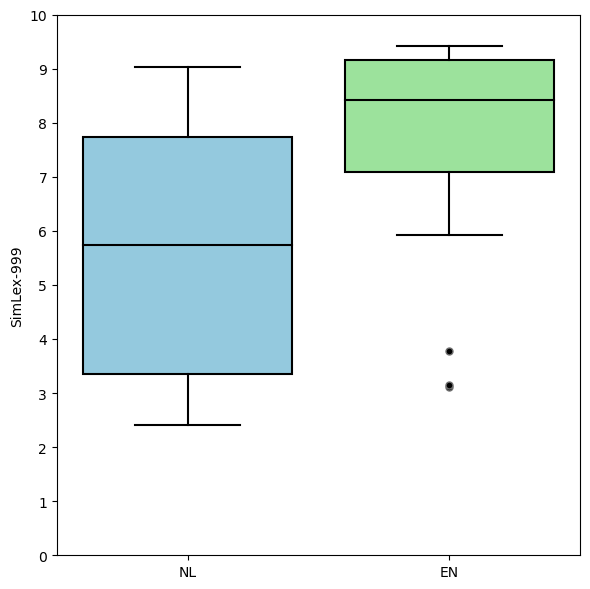

In [11]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

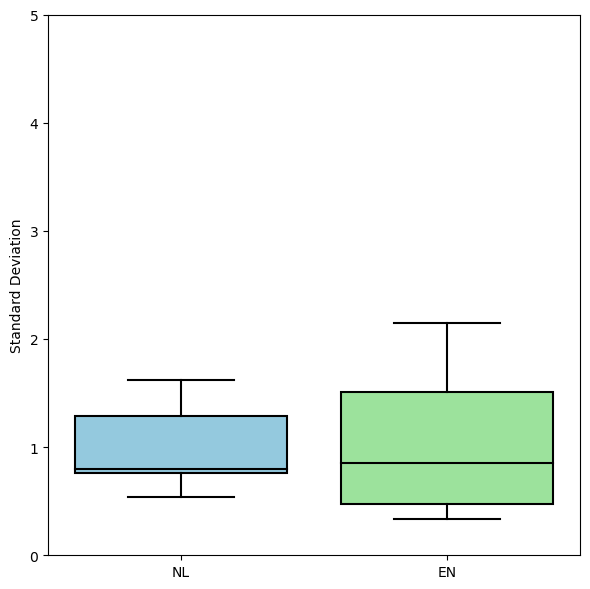

In [12]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

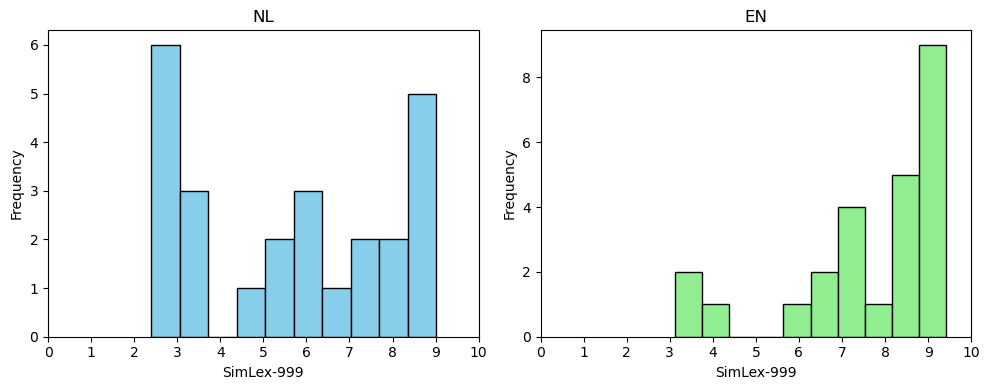

In [13]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

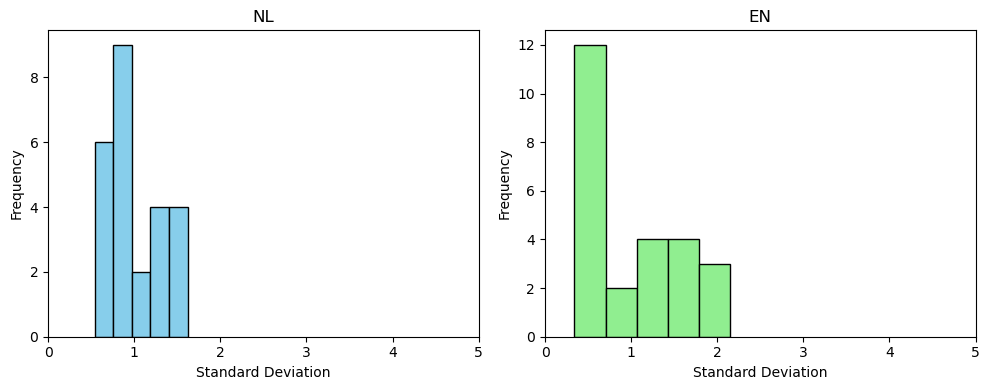

In [14]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [15]:
# Count outliers
print_outlier_counts(nl_pred)

No outliers found in columns: nl_pred_sl, nl_pred_sd


In [16]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')

No outliers found in nl_pred_sd


#### **4.2. EN**

In [17]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sl: 3
No outliers found in columns: en_pred_sd


In [18]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')

No outliers found in en_pred_sd


#### **4.3. Add to Summary**

In [19]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,5.66,7.64,0.98,1.00
std,2.36,1.91,0.36,0.57
min,2.40,3.12,0.54,0.34
25%,3.35,7.08,0.76,0.47
50%,5.74,8.42,0.80,0.85
75%,7.74,9.16,1.29,1.51
max,9.02,9.42,1.62,2.15
median,5.74,8.42,0.80,0.85
outliers,0.00,3.00,0.00,0.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

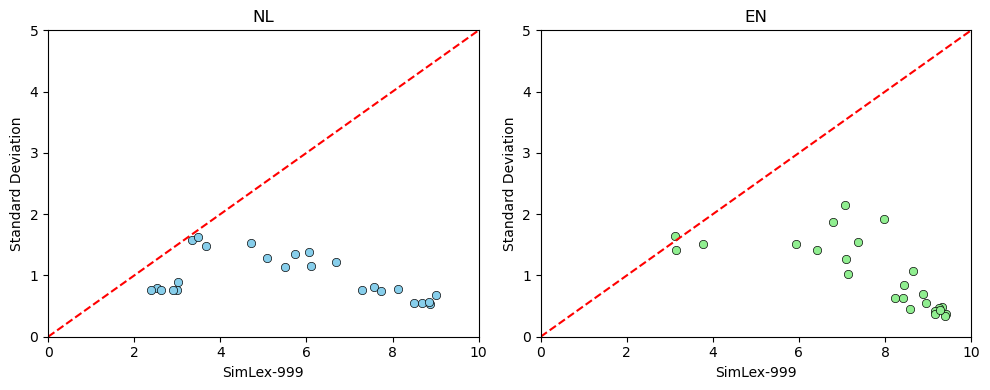

In [20]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [21]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,-0.47016,1.770977e-02,significant
1,en_pred_sl,en_pred_sd,-0.85341,5.901343e-08,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

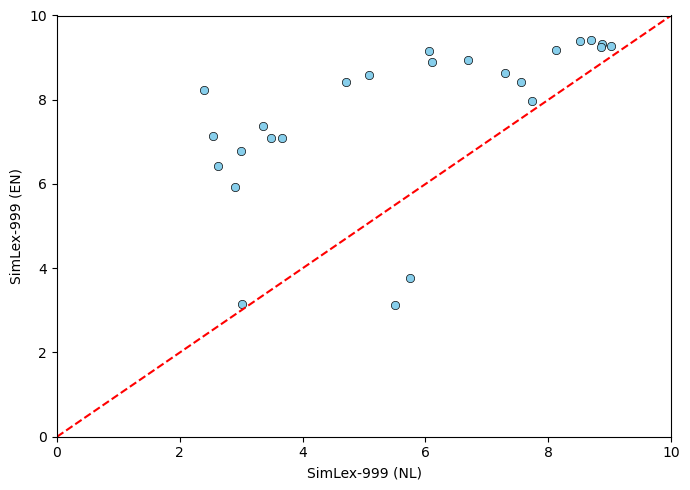

In [22]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [23]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.76462
P-value: 8.574570332971608e-06
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

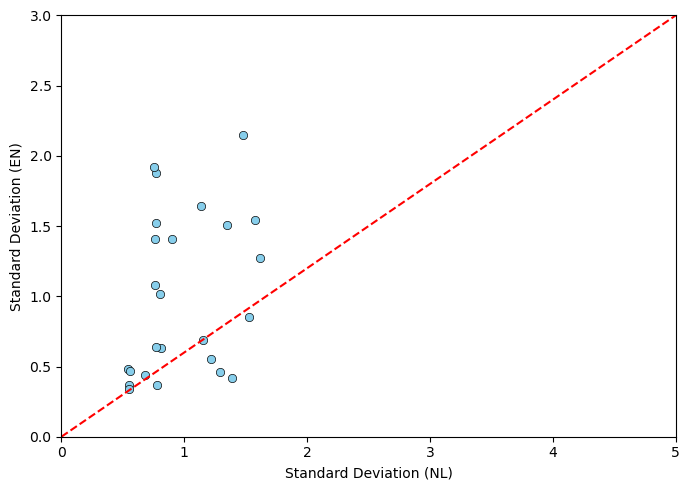

In [24]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [25]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.3359
P-value: 0.10066817978911756
The correlation is not statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [26]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 7.91


#### **7.3. Mean Absolute Error (MAE)**

In [27]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.33


#### **7.4. Bland-Altman**

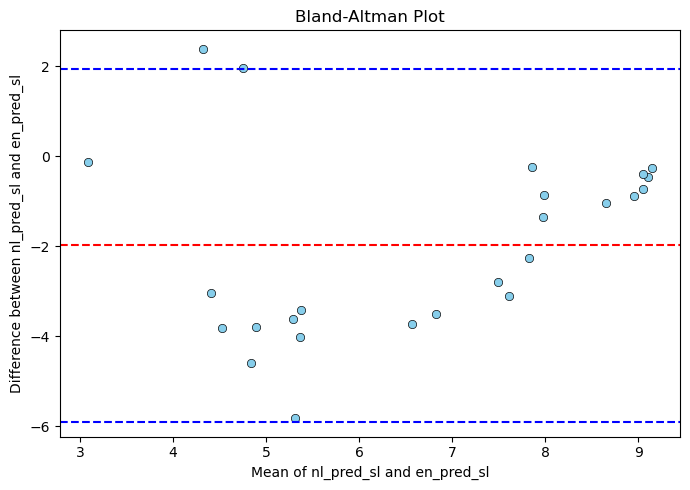

In [28]:
# SimLex-999
bland_altman_plot(data1=conc['nl_pred_sl'], data2=conc['en_pred_sl'])

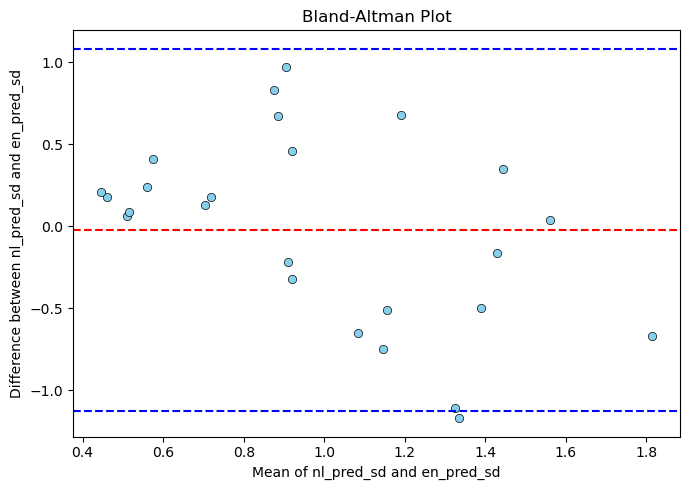

In [29]:
# Standard Deviation
bland_altman_plot(data1=conc['nl_pred_sd'], data2=conc['en_pred_sd'])